In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

import numpy as np

In [ ]:
# π = np.pi
# 
# backend = BasicAer.get_backend('qasm_simulator')
# 
# q = QuantumRegister(1)
# c = ClassicalRegister(1)
#    circuit = QuantumCircuit(q, c)

In [ ]:
# backend_statevector = BasicAer.get_backend('statevector_simulator')
# circuit = QuantumCircuit(q, c)
# circuit.iden(q[0])
# job = execute(circuit, backend_statevector)
# plot_bloch_multivector(job.result().get_statevector(circuit))

In [ ]:
# backend_statevector = BasicAer.get_backend('statevector_simulator')
# circuit = QuantumCircuit(q, c)
# 
# circuit.rx(π, q[0])
# #circuit.ry(π, q[0])
# 
# job = execute(circuit, backend_statevector)
# plot_bloch_multivector(job.result().get_statevector(circuit))

In [ ]:
# Quantum Bayesian Network Inference  @Sashwat Anagolum

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer
from qiskit import execute 

# Create 4 qubit register, 3 for the nodes in the Bayesian Network, one for the ancilla qubit
# and a 3 bit ClassicalRegister to hold the sampled values

net = QuantumRegister(4, 'qreg')
cl = ClassicalRegister(3, 'creg')

circ = QuantumCircuit(net, cl, name='circ')

In [3]:
# Setting up a small function to convert probabilities to angles 
# -> maps probabilities to a value between 0 and pi 
from numpy import arcsin, sqrt 

def probToAngle(prob): 
    return 2*arcsin(sqrt(prob))

In [4]:
print(probToAngle(0.35))
print(probToAngle(0.76))
print(probToAngle(0.39))
print(probToAngle(0.00))
print(probToAngle(1))

1.266103672779499
2.1176472774908404
1.3489818562981022
0.0
3.141592653589793


In [5]:
# Let's set up the qubits representing the nodes of the Bayesian networks. 
# For this, we set the angle according to the probability given in the Bayesian Probability Table 
# The Nodes in the net were as follows: P -> E -> H

# Setting up a qubit to represent the variable P 
circ.u3(probToAngle(0.35), 0, 0, net[0])

# Since we have P = 1, we use the second row of the probability table for the variable E 
circ.u3(probToAngle(0.76), 0, 0, net[1])

# Setting up the qubit representing variable H assuming E = 0
circ.u3(probToAngle(0.39), 0, 0, net[2])

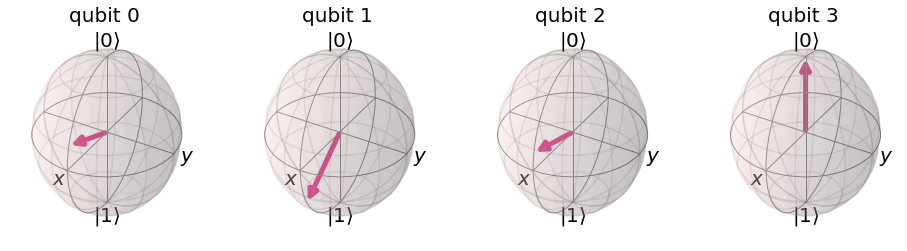

In [6]:
backend_statevector = BasicAer.get_backend('statevector_simulator')


job = execute(circ, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circ))

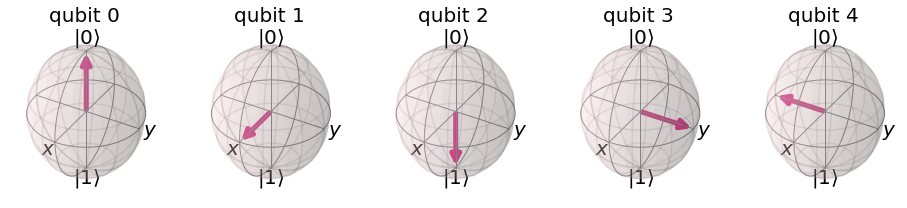

In [7]:
# Let's fiddle a bit with the U gate 

q = QuantumRegister(5)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

circuit.h(q[1])
circuit.x(q[2])
circuit.rx(3*np.pi/2,q[3])
circuit.rx(np.pi/2,q[4])

backend_statevector = BasicAer.get_backend('statevector_simulator')

job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

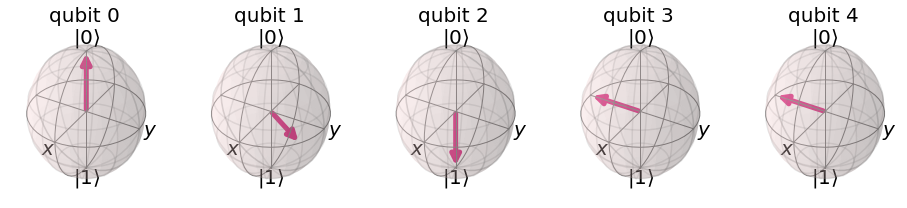

In [8]:
q = QuantumRegister(5)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

backend_statevector = BasicAer.get_backend('statevector_simulator')

circuit.h(q[1])
circuit.x(q[2])
circuit.rx(3*np.pi/2,q[3])
circuit.rx(np.pi/2,q[4])


circuit.u3(0,0,0,q[0])
circuit.u3(0,1,0,q[1])
circuit.u3(0,2,0,q[2])
circuit.u3(0,np.pi,0,q[3])
circuit.u3(0,0,0,q[4])

job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

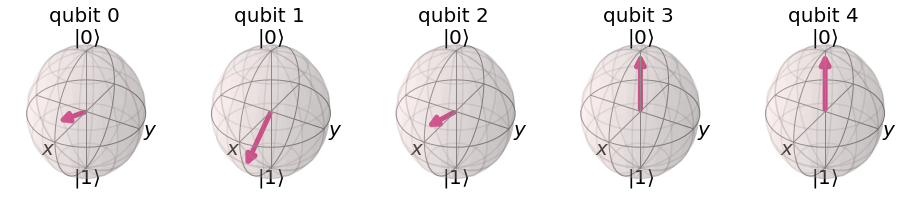

In [9]:
    
q = QuantumRegister(5)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

backend_statevector = BasicAer.get_backend('statevector_simulator')


circuit.u3(probToAngle(0.35), 0, 0, q[0])
circuit.u3(probToAngle(0.76), 0, 0, q[1])
circuit.u3(probToAngle(0.39), 0, 0, q[2])
    
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

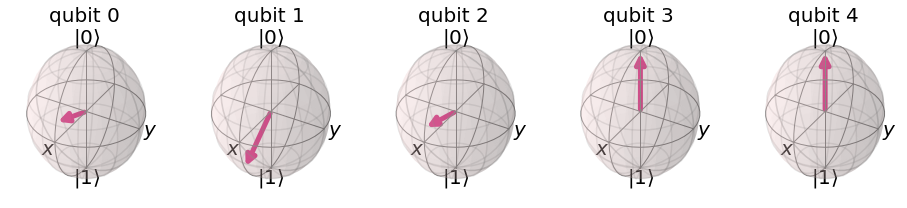

In [10]:
pi = np.pi 

q = QuantumRegister(5)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

backend_statevector = BasicAer.get_backend('statevector_simulator')

circuit.u3(probToAngle(0.35), 0, 0, q[0])
circuit.u3(probToAngle(0.76), 0, 0, q[1])
circuit.u3(probToAngle(0.39), 0, 0, q[2])

circuit.cu3(pi, pi, 0, q[0], q[1])
circuit.cu3(pi, pi, 0, q[0], q[1])  

circuit.u3(-1*probToAngle(0.35), 0, 0, q[0])
circuit.u3(-1*probToAngle(0.76), 0, 0, q[1])
circuit.u3(-1*probToAngle(0.39), 0, 0, q[2])

circuit.x(q)
circuit.cu1(pi/4, q[0], q[3])
circuit.cx(q[0], q[1])
circuit.cu1(-pi/4, q[1], q[3])
circuit.cx(q[0], q[1])
circuit.cu1(pi/4, q[1], q[3])
circuit.cx(q[1], q[2])
circuit.cu1(-pi/4, q[2], q[3])
circuit.cx(q[0], q[2])
circuit.cu1(pi/4, q[2], q[3])
circuit.cx(q[1], q[2])
circuit.cu1(-pi/4, q[2], q[3])
circuit.cx(q[0], q[2])
circuit.cu1(pi/4, q[2], q[3])
circuit.x(q)
    
circuit.u3(probToAngle(0.35), 0, 0, q[0])
circuit.u3(probToAngle(0.76), 0, 0, q[1])
circuit.u3(probToAngle(0.39), 0, 0, q[2])
    
    
job = execute(circuit, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circuit))

In [11]:
# To make sure we sample from a state with correct evidence values, we use amplitude amplification, designing an oracle
# that flips the sign of states with evidence matching ours: 



In [12]:

def oracle(circ):
    """
    Implements an oracle that flips the sign of states that contain P = 1.
    """
    circ.cu3(pi, pi, 0, net[0], net[1])
    circ.cu3(pi, pi, 0, net[0], net[1])    
    return circ


def u_gate(circ):
    """
    Implements the U gate that flips states about the average amplitude.
    
    --> Wir nehmen unser State, dass wir mit den theta werten rotiert haben, und rotieren zurück zu zero init state S0. 
    --> Flipping
    --> vom geflippten State wenden wir wieder unsere Theta Rotation an. 
    
    
    """
    # Implements the quantum circuit that converts ψ -> |000...0>
    """
    Da wir ursprünglich mit den theta Werten rotiert haben, rotieren wir jetzt mit -theta: 
    Der Vektor geht also die selbe Strecke wieder zurück und wir landen im zero init state.
    
    Dieser Schritt funktioniert nur, wenn wir auch tatsächlich die selbe Strecke wieder zurückgehen, d.h. die Theta Werte müssen stimmen. 
    """
    circ.u3(-1*probToAngle(0.35), 0, 0, net[0])
    circ.u3(-1*probToAngle(0.76), 0, 0, net[1])
    circ.u3(-1*probToAngle(0.39), 0, 0, net[2])

    # Flipping the |000...0> state using a triple controlled Z gate condtioned on P, E and H, 
    # and applied to the ancilla
    circ.x(net)
    circ.cu1(pi/4, net[0], net[3])
    circ.cx(net[0], net[1])
    circ.cu1(-pi/4, net[1], net[3])
    circ.cx(net[0], net[1])
    circ.cu1(pi/4, net[1], net[3])
    circ.cx(net[1], net[2])
    circ.cu1(-pi/4, net[2], net[3])
    circ.cx(net[0], net[2])
    circ.cu1(pi/4, net[2], net[3])
    circ.cx(net[1], net[2])
    circ.cu1(-pi/4, net[2], net[3])
    circ.cx(net[0], net[2])
    circ.cu1(pi/4, net[2], net[3])
    circ.x(net)

    # Implements the quantum circuit that converts |000...0> -> ψ 
    circ.u3(probToAngle(0.35), 0, 0, net[0])
    circ.u3(probToAngle(0.76), 0, 0, net[1])
    circ.u3(probToAngle(0.39), 0, 0, net[2])

    return circ

In [13]:
from numpy import pi 

# Apply oracle and U gate twice
circ = oracle(circ)
circ = u_gate(circ)
circ = oracle(circ)
circ = u_gate(circ)
circ.x(net[0])



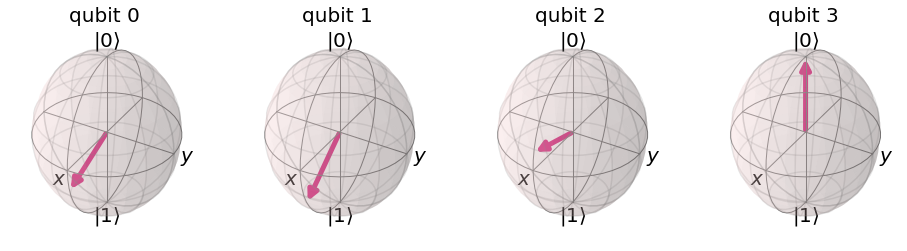

In [14]:
backend_statevector = BasicAer.get_backend('statevector_simulator')


job = execute(circ, backend_statevector)
plot_bloch_multivector(job.result().get_statevector(circ))

In [15]:
x = 0 % 4
print(x)

0


In [16]:
# Measure E, and rotate H to the P(1) value in the second row of the P(H|E) table condtioned on E
circ.measure(net[1], cl[1])
circ.u3(probToAngle(0.82) - probToAngle(0.39), 0, 0, net[2])

# Sample by measuring the rest of the qubits
circ.measure(net[0], cl[0])
circ.measure(net[2], cl[2])

In [17]:
# Finally, to calculate P(H=0|P=1), we run the experiment multiple times,
# generating a new sample with each run, and throwing away samples with incorrect evidence: 

# Get backend from Aer provider
backend = Aer.get_backend('qasm_simulator')

# Run job many times to get multiple samples
samples_list = []
n_samples = 1000

for i in range(n_samples):
    job = execute(circ, backend=backend, shots=1)
    result = list(job.result().get_counts(circ).keys())[0]
    if result[2] == '1':
        samples_list.append(result)

# Printing the number of useful samples and percentage of samples rejected
print()
print(n_samples, 'samples drawn:', len(samples_list), 'samples accepted,', n_samples-len(samples_list), 'samples rejected.' )
print('Percentage of samples rejected: ', 100*(1 - (len(samples_list)/n_samples)), '%')

# Computing P(H = 0| P = 1)
p_H = 0

for i in samples_list:
    if i[0] == '0':
        p_H += 1

p_H /= len(samples_list)

print('P(H = 0| P = 1) =', p_H)
print()


1000 samples drawn: 644 samples accepted, 356 samples rejected.
Percentage of samples rejected:  35.6 %
P(H = 0| P = 1) = 0.17236024844720496

